# Chapter 8 - Local Realism
## with Alice and Bob

In [1]:
from numpy import sin,cos,pi,sqrt,angle,exp,deg2rad,arange
import matplotlib.pyplot as plt
from qutip import *
%matplotlib inline

In [2]:
H = Qobj([[1],[0]])
V = Qobj([[0],[1]])

First define the projection operator for a state at angle $\theta$:

In [3]:
def P(theta):
    """The projection operator for a state at angle theta"""
    theta_ket = cos(theta)*H + sin(theta)*V
    return theta_ket*theta_ket.dag()

Create the projection operators for each of the angles, two for Alice, two for Bob

In [4]:
Pa1 = P(deg2rad(19))
Pa2 = P(deg2rad(-35))
Pb1 = P(deg2rad(-19))
Pb2 = P(deg2rad(35))

Create the state $\big|\psi\big\rangle = \sqrt{0.2} \big|H,H\big\rangle + \sqrt{0.8} \big|V,V\big\rangle$:

In [5]:
psi=sqrt(0.2)*tensor(H,H) + sqrt(0.8)*tensor(V,V)

Now, find the joint probability that Alice measures A1 and Bob measures B1. We do this by finding the expectation value of the projection operator for the joint state $\big|\theta_{A1},\theta_{B1}\big\rangle$. This is formed as the tensor product of the two appropriate projection operators. **In these tensor products, be sure to put Alice's operator first, then Bob's (just like we did for the signal and idler photons).** Each operator acts on the photon corresponding to the order in the `tensor()` function.

Notice we'll be using a new function `expect()`. This is equivalent to putting the operator in between the state bra and ket:

In [9]:
P1 = expect(tensor(Pa1,Pb1),psi)  # joint for A1, B1 (expect 0.09)
P2 = psi.dag()*tensor(Pa1,Pb1)*psi
P1 == P2.data[0,0]  # The only difference is that we have to pull out the value 
                    # from the Qobj using the .data[0,0] method so we can compare it to result from `expect`

True

In [10]:
P1

0.09302920042790863

Find the conditional probability $P(\theta_{B2}|\theta_{A1}) = \frac{P(\theta_{B2},\theta_{A1})}{P(\theta_{A1})}$

In [11]:
# B2 conditioned on A1 (expect 1)
Prob_b2_a1 = expect(tensor(Pa1,Pb2),psi)
#(psi.dag()*tensor(Pa1,Pb2)*psi).data[0,0]   # the joint probability
Prob_a1 = expect(tensor(Pa1,qeye(2)),psi)
#(psi.dag()*tensor(Pa1,qeye(2))*psi).data[0,0]  # the singular probability
Prob_b2a1 = Prob_b2_a1 / Prob_a1  # the conditional probability
Prob_b2a1

0.999939256912056

Find the conditional probability $P(\theta_{A2}|\theta_{B1}) = \frac{P(\theta_{A2},\theta_{B1})}{P(\theta_{B1})}$

In [12]:
# A2 conditioned on B1 (expect 1)
# can do it all on one line:
expect(tensor(Pa2,Pb1),psi) / expect(tensor(qeye(2),Pb1),psi)

0.999939256912056

In [13]:
expect(tensor(Pa2,Pb2),psi)  # joint for A2, B2 (classically expect 0.09, QM says 0)

3.39573005293161e-05

This is what we described in class.

## What if the state was just $|H,H\rangle$?

In [14]:
psi2=tensor(H,H)

In [22]:
expect(tensor(Pa1,Pb1),psi2)  # joint for A1, B1 (expect 0.09)

0.7992456137533195

In [23]:
# B2 conditioned on A1:
expect(tensor(Pa1,Pb2),psi2) / expect(tensor(Pa1,qeye(2)),psi2)

0.6710100716628343

In [24]:
# A2 conditioned on B1 
expect(tensor(Pa2,Pb1),psi2) / expect(tensor(qeye(2),Pb1),psi2)

0.6710100716628343

In [25]:
# joint for A2, B2
expect(tensor(Pa2,Pb2),psi2)

0.45025451627296204

This is harder to interpret, but we clearly have different probabilities. Finally, check if we had used a mixed state:

## A mixed state instead of the pure (entangled state).
Here we have to use the density matrix (since a `ket` cannot describe a mixed state). First some background:
QuTiP has a function that gives the density matrix from a `ket` state: `ket2dm`.

In [32]:
rho_mix = 0.2 * ket2dm(tensor(H,H)) + 0.8 * ket2dm(tensor(V,V))
rho_mix

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.2  0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0.8]]

In [33]:
# joint for A1, B1
expect(tensor(Pa1,Pb1),rho_mix)  

0.1688370108679419

In [34]:
# B2 conditioned on A1
expect(tensor(Pa1,Pb2),rho_mix) / expect(tensor(Pa1,qeye(2)),rho_mix)

0.5609865818344059

In [35]:
# A2 conditioned on B1
expect(tensor(Pa2,Pb1),rho_mix) / expect(tensor(Pb1,qeye(2)),rho_mix)

0.5609865818344059

In [36]:
# joint for A2, B2:
expect(tensor(Pa2,Pb2),rho_mix)  

0.1766384016124271

We see that  $P(\theta_{B2},\theta_{A2}) >  P(\theta_{B1},\theta_{A1})$ as we said in class for a state that obeys realism.

## Now repeat with the pure state but using density matrix techniques.
This isn't going to tell us anything new, but it shows how to work with the density matrix if you already know the `ket` state.

In [64]:
rho_pure = ket2dm(psi)  # convert from a ket to a density matrix (dm)
rho_pure

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.2  0.   0.   0.4]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.4  0.   0.   0.8]]

The calculations are actually the same in QuTiP, the `expect` function takes either a `ket` state or a density matrix.

In [38]:
# joint for A1, B1
expect(tensor(Pa1,Pb1),rho_pure)  

0.0930292004279086

In [39]:
# B2 conditioned on A1
expect(tensor(Pa1,Pb2),rho_pure) / expect(tensor(Pa1,qeye(2)),rho_pure)

0.999939256912056

In [40]:
# A2 conditioned on B1
expect(tensor(Pa2,Pb1),rho_pure) / expect(tensor(Pb1,qeye(2)),rho_pure)

0.999939256912056

In [41]:
# joint for A2, B2:
expect(tensor(Pa2,Pb2),rho_pure)  

3.3957300529310896e-05

These all agree (as they should).

## Explore the angles in more detail:
Why these angles, 19 and 35?

In [59]:
psi=sqrt(0.2)*tensor(H,H) + sqrt(0.8)*tensor(V,V)

In [60]:
angles = arange(1,90,1)

In [61]:
rads = deg2rad(angles)

Make a list of the probability of joint measurements for a pair of angles:

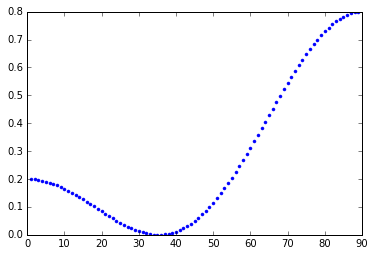

In [62]:
out = []
for r in rads:
    out.append(expect(tensor(P(-r),P(r)),psi))

plt.plot(angles,out,".") # plot in units of pi

We see that the joint probabilities have a zero at 35˚. Now plug that in to one of the conditional probabilities and see what angle for the conditional probability gives 1:

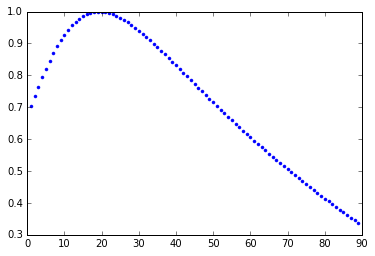

In [63]:
out = []
for r in rads:
    out.append(expect(tensor(P(r),P(deg2rad(35))),psi) / expect(tensor(P(r),qeye(2)),psi))

plt.plot(angles,out,".")

So only 19 and 35 work. Now, can you derive 19 and 35 given only the state $|\psi\rangle$?

## Challenge:
If we change the state to $\big|\psi\big\rangle = \sqrt{0.8} \big|H,H\big\rangle + \sqrt{0.2} \big|V,V\big\rangle$, the two angles that work for this state.

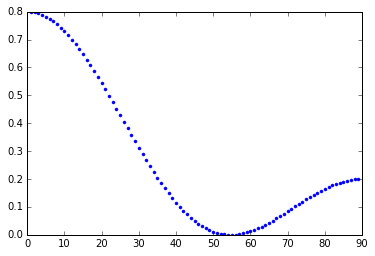

In [65]:
# Solution

psi3=sqrt(0.8)*tensor(H,H) + sqrt(0.2)*tensor(V,V)

out = []
for r in rads:
    out.append(expect(tensor(P(-r),P(r)),psi3))

plt.plot(angles,out,".") # plot in units of pi

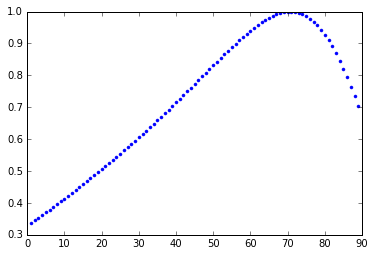

In [69]:
# Solution
out = []
for r in rads:
    out.append(expect(tensor(P(r),P(deg2rad(55))),psi3) / expect(tensor(P(r),qeye(2)),psi3))

plt.plot(angles,out,".")